# TKO2096 
## EXERCISE IV | Soil water permeability prediction in forest harvesting operations
YUE MA 520790

## Libraries 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pdb
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor

## Class and functions

- `C_index()`: return C-index for two sequences of data
- `geo_distance()`:calculate euclidean distance betweem two points
- `SLOO_CV()`:a class used to implement the SLOO CV.
    - `.calculate_distance()`:calculate all distance in advance and save into a matrix. By doing this the calculation cost would be decreased.
    - `.predict()`: run sloo CV using given k and raidus
    - `.select_model()`: try a set of paramters to predict and return scores with given scorer

## Load data

In [124]:
X= np.genfromtxt('/Users/mayue/Desktop/TKO-2096/Exe/ExeIV/INPUT.csv',delimiter=',')

In [125]:
y=np.genfromtxt('/Users/mayue/Desktop/TKO-2096/Exe/ExeIV/OUTPUT.csv',delimiter=',')

In [126]:
coords=np.genfromtxt('/Users/mayue/Desktop/TKO-2096/Exe/ExeIV/COORDINATES.csv',delimiter=',')

## Standardization

In [127]:
X=zscore(X)
y=zscore(y)

## Implement C-index

This part is from previous exercise.

In [128]:
def C_index(pred,true_labels):
    """pred and true_labels are sequences which have same length"""
    n=0
    h_sum=0.0
    for i in range(0,len(true_labels)):
        t=true_labels[i]
        p=pred[i]
        for j in range(i+1,len(true_labels)):
            nt=true_labels[j]
            np=pred[j]
            if t!=nt:
                n=n+1
#                 pdb.set_trace()
                if ((p<np)&(t<nt))|((p>np)&(t>nt)):
                    h_sum+=1.0
                else:
                    if p==np:
                        h_sum+=0.5
    return float(h_sum/n)

## Calculate geographical distance

In [129]:
def geo_distance(coord1,coord2):
    """calculate geographical distance between 2 points"""
    return np.sqrt(sum((coord1-coord2)**2))

## Implement SLOO

- `.scores` attribute is all scores with different k-r combination.
- `.best_scores` attribute is best k-valued model's performance with different r values
- `.best_indexs` attribute is best k value with different r values

In [130]:
class SLOO_CV():
    
    def __init__(self):
         pass
    
    def load_data(self,attributes,targets,coords):
        """load the train data before validating"""
        """coordinates should also be received"""
        self.attributes=attributes
        self.targets=targets
        self.coords=coords
        self.n=self.coords.shape[0] #number of samples
    
    def calculate_distance(self):
        """calculate distance between any 2 samples and save the results in to a matrix"""
        n=self.n
        distances=np.empty([n,n])#create an empty matrix 
        distances[:]=None #initialize values
        for i in range(0,n):
            for j in range(0,n):
                distances[i,j]=geo_distance(self.coords[i],self.coords[j])
        self.distances=distances
    
    def predict(self,num_neighbor,radius):
        """run SLOO CV with given k and radius values. return predicted values"""
        
        self.rad=radius
        n=self.n
        all_results=[]
        for i in range(0,n):
            #split train set and validate set

            X_validate=self.attributes[i,:]
            y_validate=self.targets[i]
            X_validate=X_validate.reshape(1,-1)

            dz_index=[m for m in range(0,n) if (sloo.distances[i,m]<=self.rad)&(sloo.distances[i,m]>=0)]
            
            X_train=np.delete(self.attributes,dz_index,0)
            y_train=np.delete(self.targets,dz_index,0)#remove dead zone samples

            predictor=KNeighborsRegressor(num_neighbor)
            predictor.fit(X_train,y_train)
            pred=predictor.predict(X_validate)[0]

            all_results.append(pred)
        self.results=np.array(all_results)
        return self.results
    
    def select_model(self,radius_list,k_list,scorer):
        """evaluate performance with given sets of parameters"""
        scores={}#outer dict to save scores of different raidus values
        for r in radius_list:
            scores_={} #inner dict to store score of different k values
            for k in k_list:
                pred=self.predict(num_neighbor=k,radius=r) 
                scores_[k]=scorer(pred,self.targets)
                print("now raidus={},k={}".format(r,k))
            scores[r]=scores_
        self.scores=scores #the scores of all different parameter combination
        
        best_scores={}
        best_indexs={}
        for i in scores.keys():
            best_scores[i]=max(scores[i].values())#the score of the best model
            best_indexs[i]=max(scores[i],key=scores[i].get)# the parameter values of the best model
            print("For raidus={}, the best k is {}, the score is {}".format(i,max(scores[i],key=scores[i].get),max(scores[i].values())))
        self.best_scores=best_scores 
        self.best_index=best_indexs
        print("the best radius which can get best performance is: {}".format(max(best_scores,key=best_scores.get)))
        
        

## Results

In [131]:
sloo=SLOO_CV()
sloo.load_data(X,y,coords)
sloo.calculate_distance()
sloo.select_model(range(0,201,10),[1,3,5,7,9],C_index)

now raidus=0,k=1
now raidus=0,k=3
now raidus=0,k=5
now raidus=0,k=7
now raidus=0,k=9
now raidus=10,k=1
now raidus=10,k=3
now raidus=10,k=5
now raidus=10,k=7
now raidus=10,k=9
now raidus=20,k=1
now raidus=20,k=3
now raidus=20,k=5
now raidus=20,k=7
now raidus=20,k=9
now raidus=30,k=1
now raidus=30,k=3
now raidus=30,k=5
now raidus=30,k=7
now raidus=30,k=9
now raidus=40,k=1
now raidus=40,k=3
now raidus=40,k=5
now raidus=40,k=7
now raidus=40,k=9
now raidus=50,k=1
now raidus=50,k=3
now raidus=50,k=5
now raidus=50,k=7
now raidus=50,k=9
now raidus=60,k=1
now raidus=60,k=3
now raidus=60,k=5
now raidus=60,k=7
now raidus=60,k=9
now raidus=70,k=1
now raidus=70,k=3
now raidus=70,k=5
now raidus=70,k=7
now raidus=70,k=9
now raidus=80,k=1
now raidus=80,k=3
now raidus=80,k=5
now raidus=80,k=7
now raidus=80,k=9
now raidus=90,k=1
now raidus=90,k=3
now raidus=90,k=5
now raidus=90,k=7
now raidus=90,k=9
now raidus=100,k=1
now raidus=100,k=3
now raidus=100,k=5
now raidus=100,k=7
now raidus=100,k=9
now raidus

```
For raidus=0, the best k is 9, the score is 0.721295089518
For raidus=160, the best k is 7, the score is 0.617502229365
For raidus=130, the best k is 7, the score is 0.621429691361
For raidus=100, the best k is 7, the score is 0.687506737092
For raidus=70, the best k is 9, the score is 0.694447866459
For raidus=40, the best k is 9, the score is 0.704090132138
For raidus=10, the best k is 9, the score is 0.711954505557
For raidus=140, the best k is 7, the score is 0.619256323067
For raidus=110, the best k is 7, the score is 0.65583085665
For raidus=80, the best k is 9, the score is 0.690814036669
For raidus=200, the best k is 7, the score is 0.614657251771
For raidus=50, the best k is 9, the score is 0.70084372887
For raidus=20, the best k is 9, the score is 0.711211850562
For raidus=190, the best k is 7, the score is 0.615781733627
For raidus=150, the best k is 7, the score is 0.616445993373
For raidus=120, the best k is 7, the score is 0.634591693743
For raidus=180, the best k is 7, the score is 0.616143961676
For raidus=90, the best k is 7, the score is 0.689325226891
For raidus=60, the best k is 9, the score is 0.699204428212
For raidus=170, the best k is 7, the score is 0.61713580157
For raidus=30, the best k is 9, the score is 0.705195365161
```

In [136]:
a=pd.DataFrame.from_dict(sloo.best_scores,orient='index',columns=['c-index'])
a=a.sort_index()#transfer the data into `DataFrame` to make visualization easier

Text(0,0.5,'c-index')

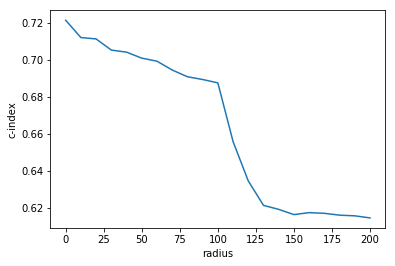

In [139]:
"""visualization"""
plt.plot(a['c-index'],'-')
plt.xlabel("radius")
plt.ylabel("c-index")

We can find that when raidus=0, there is the best performance. Because of SAC, this performance may be optimistic. When radius is 100~125, the performance witnessed a huge decreasement.